In [1]:
!pip install tensorflow-gpu


     -------------------------------------- 438.0/438.0 MB 2.0 MB/s eta 0:00:00


You should consider upgrading via the 'C:\Users\Joyti\anaconda3 64-bit\python.exe -m pip install --upgrade pip' command.


In [2]:
import tensorflow as tf

In [3]:
print(tf.__version__)

2.8.0


In [4]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
# Importing the dataset
dataset = pd.read_csv('Churn_Modelling.csv')


In [6]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
dataset.shape

(10000, 14)

In [9]:
## Divide the dataset into dependent and independent variable
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [10]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [12]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [13]:
#Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [15]:
geography

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [16]:
gender

,Male
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


In [17]:
## Concatenate the Data Frames

X=pd.concat([X,geography,gender],axis=1)

## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)



In [18]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [19]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [20]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [21]:
# Feature Scaling 
# Makes the flow of gradient descent smooth and helps algorithms quickly reach the minima of the cost function
# standard scaler basically based on z score.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [23]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(8000, 11)
(8000,)
(2000, 11)
(2000,)


In [9]:
# Part 2 - Now let's make the ANN!

In [24]:
from tensorflow.keras.models import Sequential # for both backward and forward propagation.
from tensorflow.keras.layers import Dense # dense  is create hidden layer in neurons.
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU #activation Functions.
from tensorflow.keras.layers import Dropout #to reduce overfitting(test error large) its act like regularization(L1 and L2)
                                            # remove dead neuron.

In [25]:
# Initialising the ANN
classifier = Sequential()

In [29]:
# Adding the input layer .
classifier.add(Dense(units=11,activation='relu'))

In [30]:
# Adding the 1st hidden layer
classifier.add(Dense(units=7,activation='relu'))

In [31]:
# Adding the 2st hidden layer
classifier.add(Dense(units=6,activation='relu'))

In [32]:
# Adding the output layer
classifier.add(Dense(units=1,activation='sigmoid'))

In [33]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [34]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=50)

Epoch 1/50
536/536 [==============================] - 4s 5ms/step - loss: 0.5183 - accuracy: 0.7957 - val_loss: 0.4582 - val_accuracy: 0.7955
Epoch 2/50
536/536 [==============================] - 2s 3ms/step - loss: 0.4417 - accuracy: 0.7962 - val_loss: 0.4384 - val_accuracy: 0.7955
Epoch 3/50
536/536 [==============================] - 2s 3ms/step - loss: 0.4258 - accuracy: 0.7962 - val_loss: 0.4290 - val_accuracy: 0.7955
Epoch 4/50
536/536 [==============================] - 2s 3ms/step - loss: 0.4144 - accuracy: 0.8003 - val_loss: 0.4190 - val_accuracy: 0.8213
Epoch 5/50
536/536 [==============================] - 2s 3ms/step - loss: 0.4052 - accuracy: 0.8304 - val_loss: 0.4127 - val_accuracy: 0.8251
Epoch 6/50
536/536 [==============================] - 2s 3ms/step - loss: 0.3964 - accuracy: 0.8336 - val_loss: 0.4034 - val_accuracy: 0.8296
Epoch 7/50
536/536 [==============================] - 2s 3ms/step - loss: 0.3857 - accuracy: 0.8418 - val_loss: 0.3966 - val_accuracy: 0.8353
Epoch 

In [35]:
# list all data in history

print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


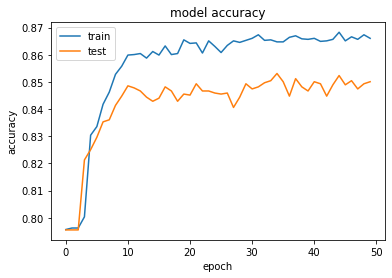

In [36]:

# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

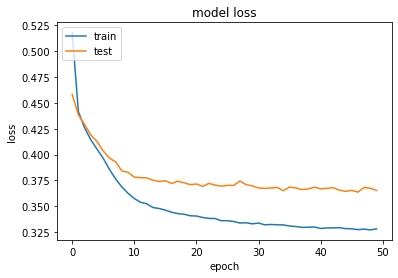

In [37]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [38]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [39]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1502,   93],
       [ 195,  210]], dtype=int64)

In [40]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [41]:
score

0.856